Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Yohanan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yohanan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Correlation Analysis Results:
textblob_polarity:
  Pearson r: -0.090
  p-value: 0.910
  very weak negative correlation (not statistically significant)

vader_compound:
  Pearson r: -0.090
  p-value: 0.910
  very weak negative correlation (not statistically significant)



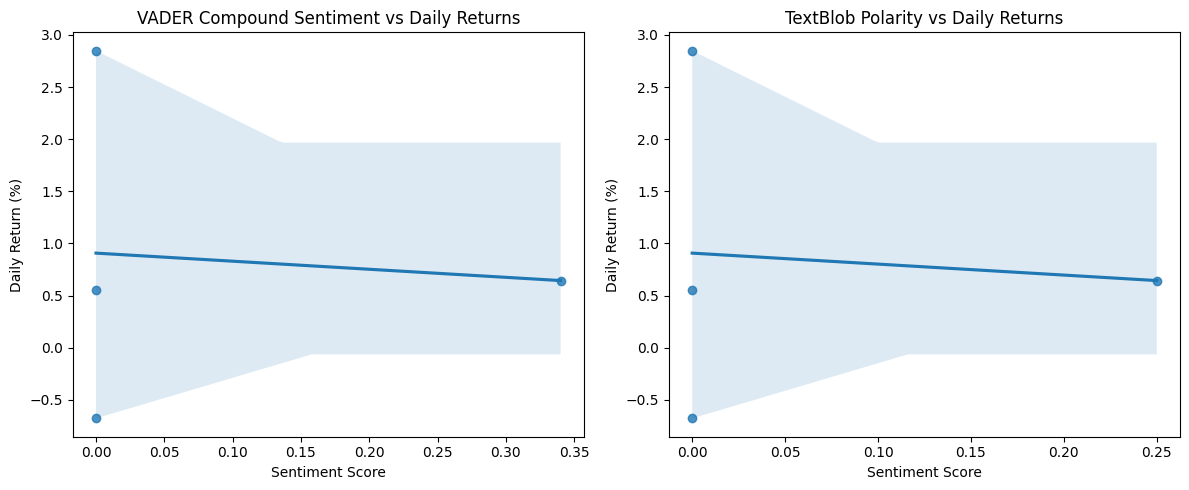

In [ ]:
%pip install nltk
import sys
import os
import sys
import os
import nltk
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Define the path to correlation.py in the scripts directory one level above the current working directory
correlation_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'scripts', 'correlation.py'))
scripts_dir = os.path.dirname(correlation_path)
if scripts_dir not in sys.path:
	sys.path.insert(0, scripts_dir)

if not os.path.exists(correlation_path):
	raise FileNotFoundError(f"Could not find '{correlation_path}'. Please ensure 'correlation.py' exists in the 'scripts' directory one level above your current working directory.")

try:
	from scripts.correlation import align_data, analyze_correlation, calculate_sentiment, interpret_correlation, plot_correlation
except ModuleNotFoundError:
	raise ModuleNotFoundError("Could not import 'correlation'. Make sure 'correlation.py' exists in the scripts directory and is accessible.")
import pandas as pd

nltk.download('vader_lexicon')
nltk.download('punkt')
# Use the already loaded news_df and stock_df variables from the notebook
# Ensure 'date' column is in datetime format and handle missing values
news_df = pd.read_csv('data/raw_analyst_ratings.csv')
stock_df = pd.read_csv('data/yfinance_data/AAPL_historical_data.csv')

# Standardize column names to lowercase for consistency
stock_df.columns = [col.lower() for col in stock_df.columns]

# Ensure 'date' columns are datetime and drop missing dates
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')
news_df = news_df.dropna(subset=['date'])

# Remove timezone info if present
if hasattr(news_df['date'].dt, 'tz') and (news_df['date'].dt.tz is not None or news_df['date'].astype(str).str.contains(r'[+-]\d{2}:\d{2}').any()):
	news_df['date'] = news_df['date'].dt.tz_localize(None)

# Ensure stock_df has a 'date' column in datetime format
stock_df['date'] = pd.to_datetime(stock_df['date'], errors='coerce')

merged_df = align_data(news_df, stock_df)
analyze_correlation(merged_df)
calculate_sentiment(news_df)  
interpret_correlation(news_df, stock_df)
plot_correlation(news_df, stock_df)
import matplotlib.pyplot as plt
plt.show()  
